In [17]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import pickle
import seaborn as sns

In [18]:
df = pd.read_csv('./output/dataset.csv')
df.head(5)

,Class,Point2_X,Point2_Y,Point3_X,Point3_Y,Point4_X,Point4_Y,Point5_X,Point5_Y,Point6_X,...,Point17_X,Point17_Y,Point18_X,Point18_Y,Point19_X,Point19_Y,Point20_X,Point20_Y,Point21_X,Point21_Y
0,A,0.113495,-0.082870,0.181338,-0.214224,0.191743,-0.324273,0.176989,-0.408945,0.088995,...,0.009401,-0.114414,-0.131490,-0.251106,-0.068488,-0.264602,-0.054249,-0.181575,-0.055466,-0.128653
1,A,0.117747,-0.071520,0.192580,-0.206726,0.203706,-0.324133,0.199602,-0.415938,0.101678,...,0.026212,-0.104201,-0.124266,-0.265737,-0.052779,-0.257111,-0.040167,-0.167494,-0.040408,-0.110646
2,A,0.074529,-0.056717,0.124976,-0.161563,0.136414,-0.249405,0.132418,-0.320011,0.076592,...,-0.032550,-0.106327,-0.095463,-0.181809,-0.096761,-0.221975,-0.089207,-0.164900,-0.080041,-0.118804
3,A,0.116533,-0.095569,0.184809,-0.251257,0.181613,-0.380073,0.169156,-0.485542,0.071329,...,-0.001719,-0.126659,-0.181320,-0.265591,-0.107658,-0.301670,-0.078174,-0.204446,-0.072207,-0.136792
4,A,0.115344,-0.095472,0.185029,-0.257217,0.183975,-0.386701,0.171799,-0.489619,0.075638,...,-0.000573,-0.125995,-0.177708,-0.268218,-0.108086,-0.303106,-0.079395,-0.207734,-0.070093,-0.138574


In [19]:
# df.drop('No',axis=1,inplace=True)
# df.info()

In [20]:
df['Class'].value_counts()

Class
K        1002
S        1002
Y        1000
Z         996
O         995
F         994
P         992
D         990
R         988
C         980
I         972
H         970
Q         967
M         964
G         952
T         942
J         939
V         928
E         927
U         921
A         918
X         915
L         912
B         900
W         869
space     855
N         647
Name: count, dtype: int64

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smt = SMOTE()
usm = RandomUnderSampler()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
svm = SVC()

pipeline = Pipeline([('smt',smt), ('svm',svm)])
# pipeline = Pipeline([('usm',usm), ('svm',svm)])
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [1, 0.1, 0.01, 0.001],
    'svm__kernel': ['linear', 'rbf']
}

grid = GridSearchCV(pipeline,param_grid=param_grid, cv = cv, scoring='accuracy')

grid.fit(X_train,y_train)




GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smt', SMOTE()), ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [1, 0.1, 0.01, 0.001],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [22]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best parameters found: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")

print(classification_report(y_test, y_pred))

Best parameters found: {'svm__C': 100, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best cross-validation score: 0.9972480847702088
              precision    recall  f1-score   support

           A       0.99      1.00      1.00       175
           B       1.00      1.00      1.00       167
           C       1.00      1.00      1.00       185
           D       0.99      0.99      0.99       191
           E       1.00      1.00      1.00       211
           F       0.99      1.00      0.99       202
           G       1.00      1.00      1.00       191
           H       1.00      1.00      1.00       204
           I       1.00      0.99      0.99       191
           J       1.00      0.97      0.99       186
           K       1.00      1.00      1.00       201
           L       1.00      0.99      1.00       178
           M       0.99      1.00      1.00       175
           N       1.00      0.99      1.00       128
           O       0.98      1.00      0.99       217
         

<Axes: >

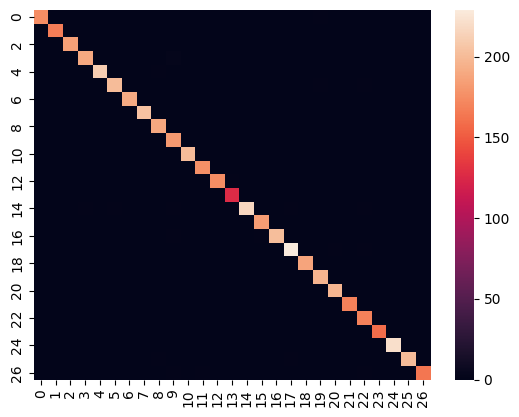

In [23]:
matrix_kebingungan = confusion_matrix(y_pred, y_test)

sns.heatmap(matrix_kebingungan)

In [24]:
model_filename = './output/model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved to {model_filename}")

Model saved to ./output/model.pkl
